IMPORT ALL THE LIBRARIES


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()
df=pd.DataFrame(iris.data)

EXPLORATORY DATA ANALYSIS


In [8]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.columns=iris.feature_names

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
df["species"]=iris.target

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,species
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [20]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,species
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2
149,5.9,3.0,5.1,1.8,2,2


In [21]:
def conv(species):
  if species==0:
    return "setosa"
  elif species==1:
    return  "versicolor"
  else:
    return "virginica"

In [23]:
df["species"]=df["species"].apply(conv)

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [25]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,species
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [27]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species', 'species'],
      dtype='object')

In [30]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species                int64
species                int64
dtype: object

In [31]:
df.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [32]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
Species               3
species               3
dtype: int64

In [33]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000


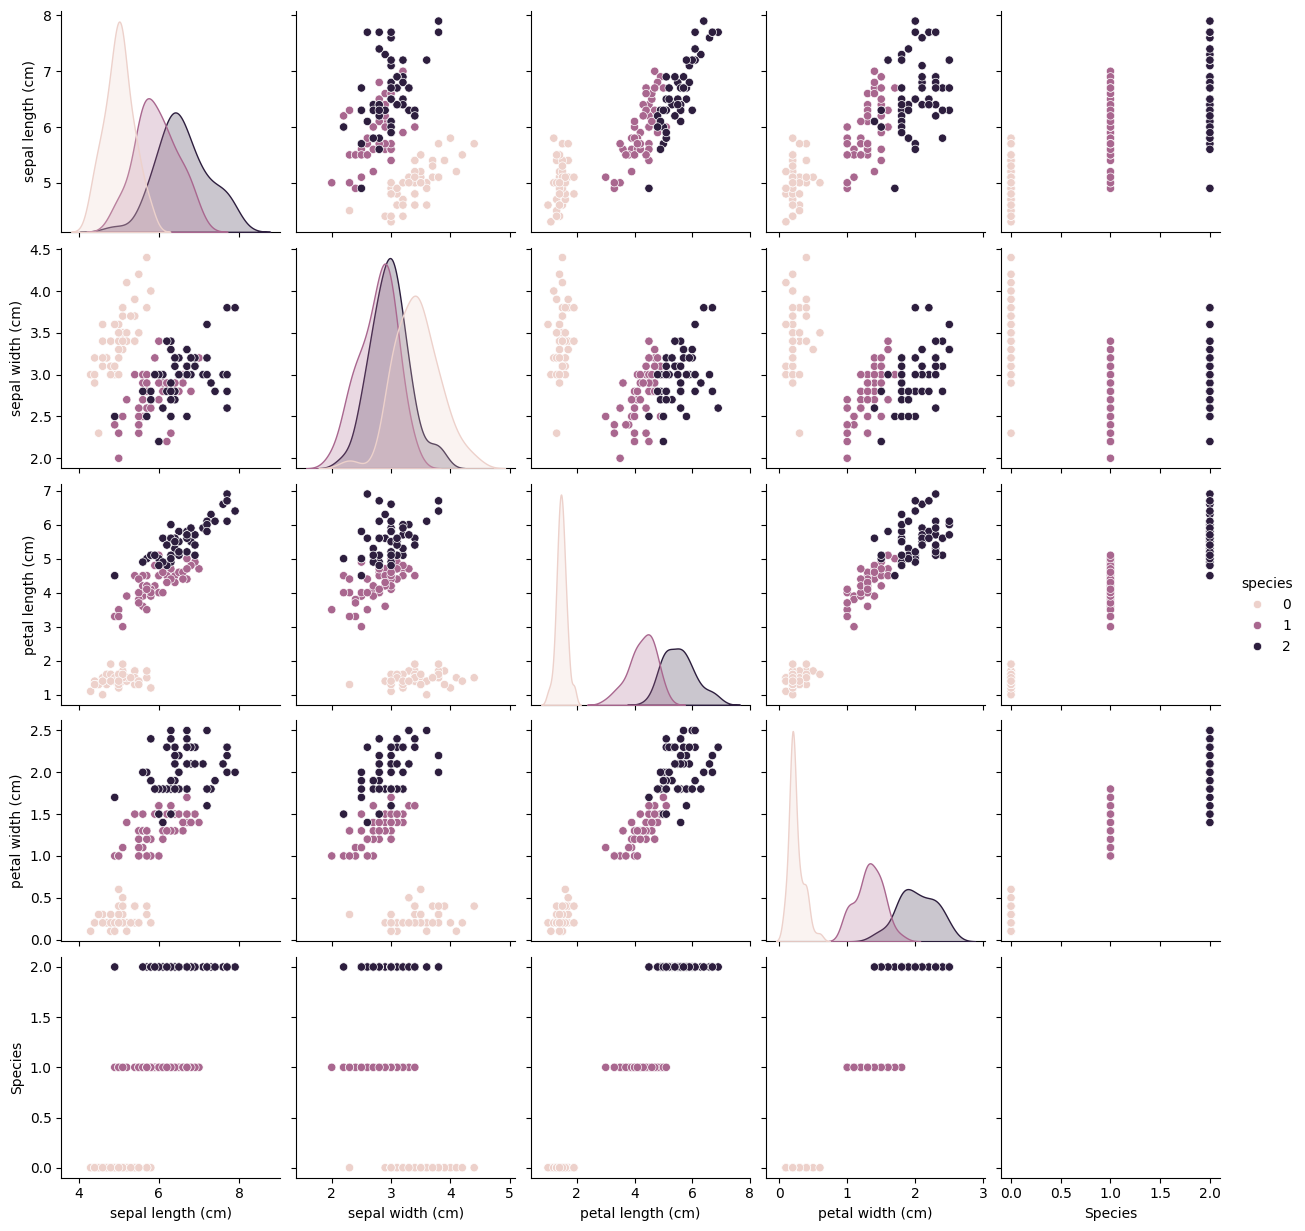

In [38]:
sns.pairplot(df, hue="species")

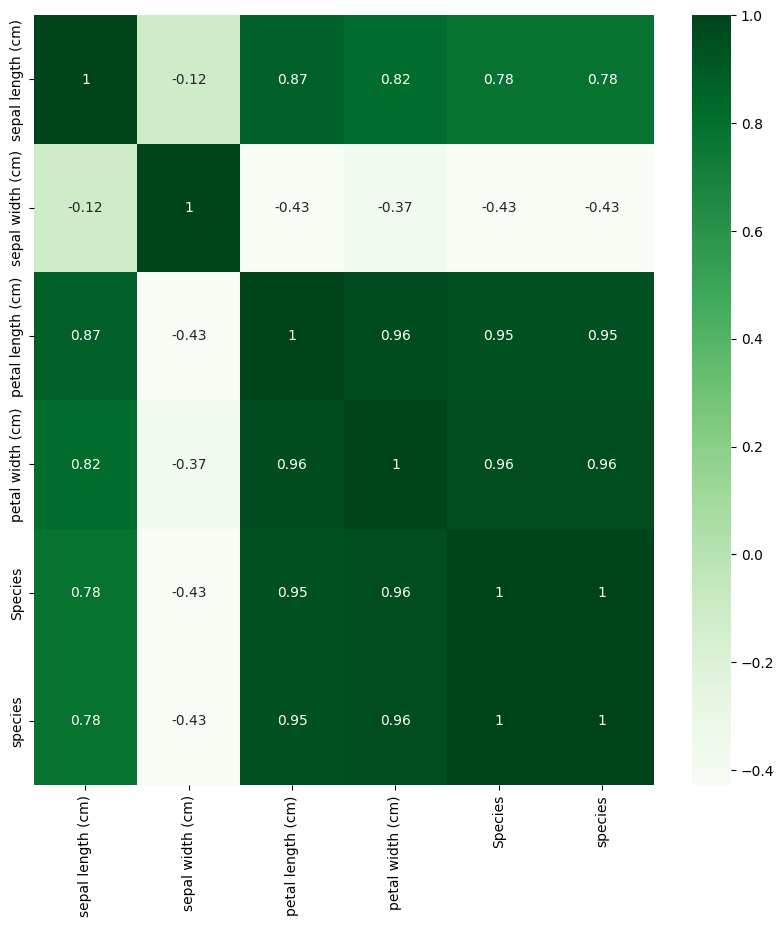

In [43]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), annot=True, cmap='Greens')
plt.show()

<Axes: >

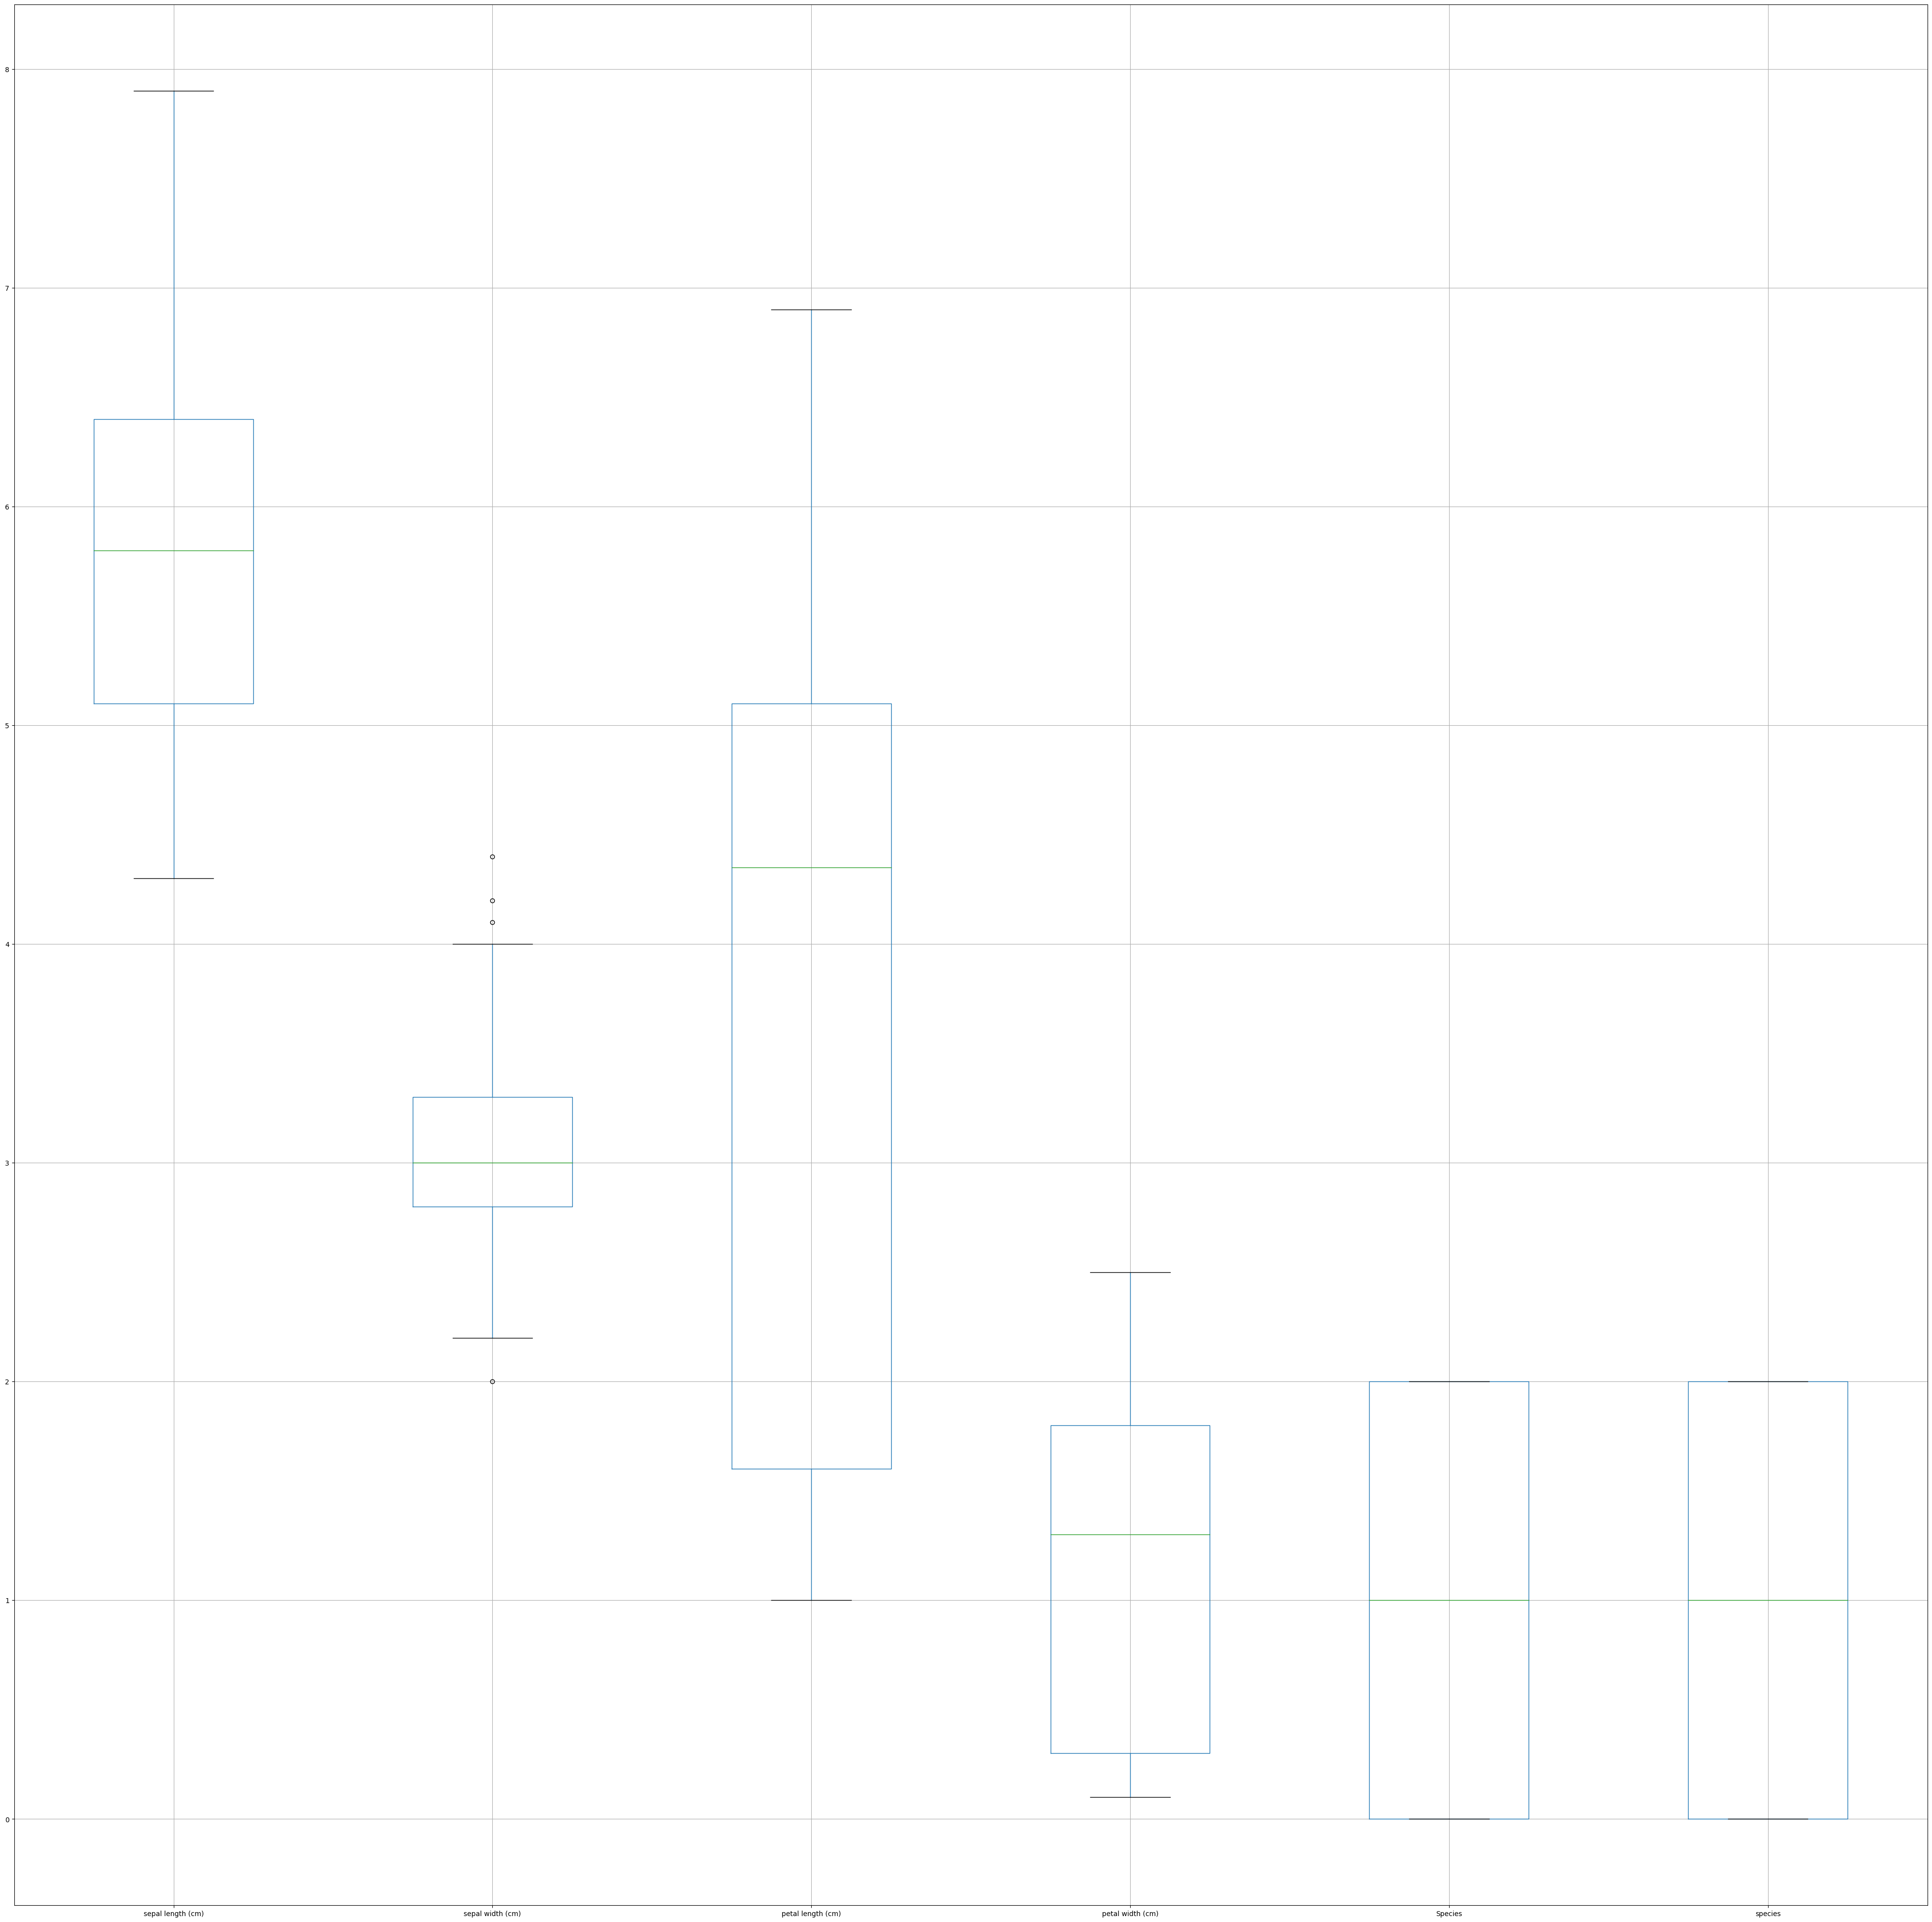

In [44]:
plt.figure(figsize=(50,50))
df.boxplot()

In [46]:
X=np.array(df.drop('species',axis=1))
y=np.array(df.Species)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=42)

In [50]:
len(X_train)

120

In [51]:
len(y_train)

120

In [52]:
len(X_test)

30

In [53]:
len(y_test)

30

In [54]:
model=LinearRegression()

In [55]:
model.fit(X_train,y_train)

LinearRegression()

In [56]:
model.intercept_

1.2212453270876722e-15

In [57]:
model.coef_

array([ 1.00793549e-16, -3.88578059e-16, -2.22044605e-16,  2.77555756e-16,
        1.00000000e+00])

In [58]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [59]:
y_pred=model.predict(X_test)

In [60]:
y_pred

array([1.00000000e+00, 2.49628331e-17, 2.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.22320488e-16, 1.00000000e+00, 2.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 2.56213316e-16,
       1.82439807e-16, 2.05230405e-16, 8.89562459e-18, 1.00000000e+00,
       2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.00000000e+00,
       1.51765004e-16, 2.00000000e+00, 1.59798608e-16, 2.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 2.00000000e+00, 2.00000000e+00,
       3.11724467e-16, 2.00702165e-16])

In [61]:
model.score(X_test,y_test)

1.0

In [64]:
r2_score(y_pred,y_test)

1.0

In [65]:
mean_squared_error(y_test,y_pred)

3.311656788327824e-32

In [66]:
mean_absolute_error(y_test,y_pred)

1.0927883175344533e-16

Text(0.5, 1.0, 'Actual Price V/s Predicted Price')

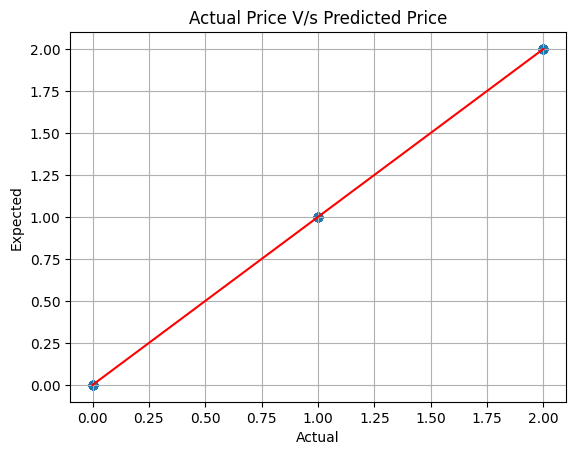

In [70]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Expected")
plt.grid()
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)], color='red')
plt.title('Actual Price V/s Predicted Price')

In [ ]:
()